# Capstone Part Two

India's startup ecosystem has notched up record investment of nearly $ 36 billion in privately held companies this year as demand for digitisation grew manifold amid the Covid-19 pandemic. The goal of my capstone project is to create a recommendation/prediciton engine for Indian Start-ups.

Purpose:


● Identify patterns and develop hypotheses.

● Test technical assumptions. Inform model selection and feature engineering.

● Build an intuition for the data.

Process:


 Form hypotheses/develop investigation themes to explore

I first wanted to see how the amount of fudning in total USD differed between the different states. The main states that received the most funding was by far Delhi, then Kerala, Chandigrah, Goa, Haryana, Karnataka, and Pradesh. As can be seen on the graph below, Delhi has received nearly all of the start-up funding. This will help give me a better idea of where the money is going. However, that does not tell the whole story!

In [1]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


Wrangling data

In [2]:
df=pd.read_excel(r'C:\Users\ptlon\startup_state_gdp.xlsx')
df.head()

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,1/30/2017,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,10/14/2016,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,3/7/2017,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703
3,3/19/2016,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,30000,12,117.703
4,2/4/2016,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,30000,12,117.703


Tidying the data

In [3]:
df.head()

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,1/30/2017,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,10/14/2016,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,3/7/2017,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703
3,3/19/2016,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,30000,12,117.703
4,2/4/2016,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,30000,12,117.703


In [4]:
#converting to DateTime

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703
3,2016-03-19,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,30000,12,117.703
4,2016-02-04,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,30000,12,117.703


In [7]:
#Finding Null data

In [8]:
df['Date'].isnull().values.any()

False

In [9]:
df['GDP'].isnull().values.any()

False

In [10]:
df['Industry'].isnull().values.any()

False

In [11]:
df['Startup Name'].isnull().values.any()

False

In [12]:
df['Amount (In USD)'].isnull().values.any()

True

In [13]:
df['Amount (In USD)'].isna().values.any()

True

In [14]:
df['Amount (In USD)'].dropna


<bound method Series.dropna of 0         22500
1         25000
2         30000
3         30000
4         30000
         ...   
490         NaN
491         NaN
492    15500000
493     3584000
494         NaN
Name: Amount (In USD), Length: 495, dtype: object>

In [15]:
df.head()

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703
3,2016-03-19,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,30000,12,117.703
4,2016-02-04,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,30000,12,117.703


Exploration


Exploring Each Variable:
'Date' 'Startup' 'Name' 'Industry' 'Sub-Vertical' 'State' 'Investors’ Name' 'Investment Type' 'Amount (In USD') 'Rank' 'GDP'

In [16]:
df.mean()

C:\Users\ptlon\AppData\Local\Temp/ipykernel_18796/3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
C:\Users\ptlon\AppData\Local\Temp/ipykernel_18796/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Rank     12.478788
GDP     113.534770
dtype: float64

We can see the Mean of Rank and GPD, the two numerical variables. Lets explore what that means.

In [17]:
df['Rank'].value_counts()

12    470
25     11
23     10
11      1
13      1
5       1
3       1
Name: Rank, dtype: int64

The 12th ranked State, by GDP, in India is Delhi. This fits into our hypothesis that most funding is being done in Delhi

To find the Mean, Median, Mode of the DataFrame we need to switch to numeric, which alters our Date time. We will switch it back once obersvations are complete


In [18]:
df['GDP'].value_counts()

117.703    470
6.397       11
11.115      10
118.733      1
111.519      1
226.806      1
240.726      1
Name: GDP, dtype: int64

In [19]:
df['Amount (In USD)'].value_counts()

1000000    32
100000     16
500000     14
2000000    12
5000000    12
           ..
441000      1
376000      1
375000      1
336000      1
3584000     1
Name: Amount (In USD), Length: 124, dtype: int64

Again, 117.703 corresponds to the State Delhi.

In [20]:
df.median()

C:\Users\ptlon\AppData\Local\Temp/ipykernel_18796/530051474.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()
C:\Users\ptlon\AppData\Local\Temp/ipykernel_18796/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Rank     12.000
GDP     117.703
dtype: float64

Assessing interactions between variables


I first wanted to see how the amount of fudning in total USD differed between the different states. The main states that received the most funding was by far Delhi, then Kerala, Chandigrah, Goa, Haryana, Karnataka, and Pradesh. As can be seen on the graphy below, Delhi has received nearly all of the start-up funding.



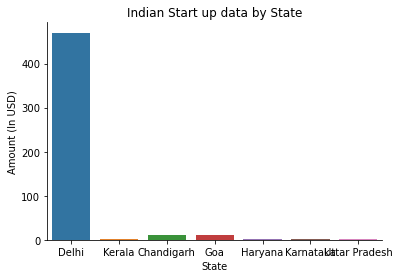

In [21]:
sns.countplot(data=df,
              x='State')
plt.xlabel('State')
plt.ylabel('Amount (In USD)')
plt.title('Indian Start up data by State')
sns.despine()
plt.show()

At first glance it might seem that there are no start-ups in the rest of the country getting funding besides the ones in Delhi. However, if you break the data down a bit more there are certainly start-ups getting a lot of money in the rest of the counrty. The start-ups that are coming out of Chandigarh and Goa, as well as others, are getting good funding compared to mass in Delhi.

In [22]:
df.dropna()
df=df.fillna("")

We can also see the type of that each startup recived funding from. This will help us see if there is one state is reciving more funding from a specific type of investment.



C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


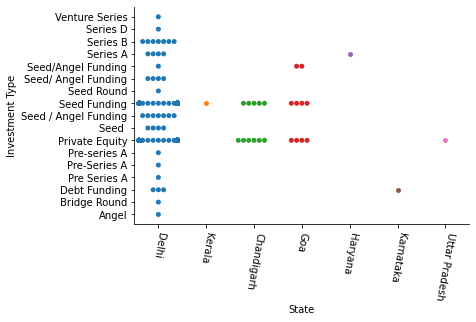

In [23]:
sns.swarmplot(data=df,
             x='State',
             y='Investment Type')
plt.xticks(rotation=-100)
plt.xlabel('State')
plt.ylabel('Investment Type')
sns.despine()
plt.savefig('Investment Types', bbox_inches='tight')
plt.show()

Again, we can see Delhi dominates most of the funding, per capita. However, the other two states; Chandigarth and Goa, both have startups that have recived large amounts of Prive Equity funding as well as Seed funiding.

Private equity is capital invested in a company or other entity that is not publicly listed or traded. Venture capital is funding given to startups or other young businesses that show potential for long-term growth.

With both Seed funding and Private Equity - we can see that Chandigarth and Goa have up and coming start-up markets that both Private Equtiy and Venture capital are interested in.

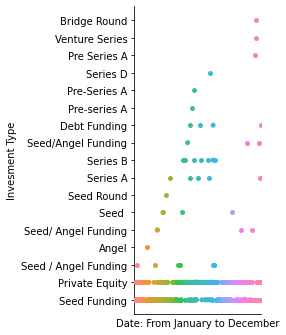

In [24]:
sns.catplot(data=df,
             x='Date',
             y='Investment Type')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
plt.xlabel('Date: From January to December')
plt.xticks(rotation=-365)
plt.ylabel('Invesment Type')
plt.xticks([])
sns.despine()
plt.savefig('Date of investment')
plt.show()

We can see that Private Equity funding, as well as, Seed Funding is distributed throughout the year. However, there is some evidence that as the year contiunes we can see that funding in other areas ramps up. This could be the same start-ups reciving multiple roudns of funding throughout the year, or, companies starting to look at Indian Start-ups beginning at the start of the year.

Looking now to compare the GDP of each state to how much money is going into each state. We can see the higher the GDP, there is much more investments.

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points

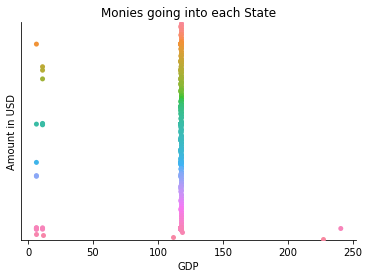

In [25]:
sns.swarmplot(data=df,
            x='GDP',
            y='Amount (In USD)')
plt.xlabel('GDP')
plt.title('Monies going into each State')
plt.ylabel('Amount in USD')
sns.despine()
plt.savefig('State Breakdown')
plt.yticks([])
plt.show()

  Now I want to Explore the Amount of USD going into each Start-up and the GDP of the state. I will do so by using clutering. For now (as a hot fix) I will delete the columns of the data frame I don't want to work with, Before so, I will save my work.

In [26]:
df.to_excel(r'EDA_DATA.xlsx', index = False)

In [27]:
del df['Startup Name']

In [28]:
del df['Industry']

In [29]:
del df['Sub-Vertical']

In [30]:
del df['State']

In [31]:
del df['Investors’ Name']

In [32]:
del df['Investment Type']

In [33]:
del df['Rank']

In [34]:
del df['Date']

In [35]:
df.head()

,Amount (In USD),GDP
0,22500,117.703
1,25000,117.703
2,30000,117.703
3,30000,117.703
4,30000,117.703


In [36]:
df['Amount (In USD)'].value_counts()

           202
1000000     32
100000      16
500000      14
5000000     12
          ... 
441000       1
376000       1
375000       1
336000       1
3584000      1
Name: Amount (In USD), Length: 125, dtype: int64

In [37]:
df['GDP'].value_counts()

117.703    470
6.397       11
11.115      10
118.733      1
111.519      1
226.806      1
240.726      1
Name: GDP, dtype: int64

Clustering

I will now begin some cleaning and shaping of the data to run a K cluster analysis between GDP and Amount in USD.
This again will give us a better picture of how much money, and where the money is going to in India.

In [38]:
df.round()

,Amount (In USD),GDP
0,22500,118.0
1,25000,118.0
2,30000,118.0
3,30000,118.0
4,30000,118.0
...,...,...
490,,11.0
491,,11.0
492,15500000,112.0
493,3584000,227.0


In [39]:
df['GDP'].value_counts()

117.703    470
6.397       11
11.115      10
118.733      1
111.519      1
226.806      1
240.726      1
Name: GDP, dtype: int64

In [40]:
pd.set_option('precision', 0)

In [41]:
df.head()

,Amount (In USD),GDP
0,22500,118
1,25000,118
2,30000,118
3,30000,118
4,30000,118


In [42]:
df.dropna(how='any', inplace=True)

In [58]:
df['Amount (In USD)'].isnull().values.any()

True

In [44]:
df.to_dict()

{'Amount (In USD)': {0: 22500,
  1: 25000,
  2: 30000,
  3: 30000,
  4: 30000,
  5: 37000,
  6: 40000,
  7: 45000,
  8: 46140,
  9: 50000,
  10: 50000,
  11: 70000,
  12: 77000,
  13: 80000,
  14: 89000,
  15: 100000,
  16: 100000,
  17: 100000,
  18: 100000,
  19: 100000,
  20: 100000,
  21: 100000,
  22: 100000,
  23: 100000,
  24: 100000,
  25: 100000,
  26: 100000,
  27: 100000,
  28: 100000,
  29: 100000,
  30: 104000,
  31: 110000,
  32: 120000,
  33: 120000,
  34: 123000,
  35: 133000,
  36: 141000,
  37: 145000,
  38: 145000,
  39: 147000,
  40: 148000,
  41: 150000,
  42: 150000,
  43: 150000,
  44: 150000,
  45: 150000,
  46: 150000,
  47: 150000,
  48: 150000,
  49: 155000,
  50: 156000,
  51: 180000,
  52: 187000,
  53: 200000,
  54: 200000,
  55: 200000,
  56: 200000,
  57: 200000,
  58: 200000,
  59: 200000,
  60: 200000,
  61: 205000,
  62: 220000,
  63: 220000,
  64: 240000,
  65: 246000,
  66: 250000,
  67: 250000,
  68: 250000,
  69: 250000,
  70: 250000,
  71: 250000

In [45]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('', 0)

In [46]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('undisclosed', 0)

In [47]:
df.head()

,Amount (In USD),GDP
0,22500,118
1,25000,118
2,30000,118
3,30000,118
4,30000,118


In [48]:
df.to_dict()

{'Amount (In USD)': {0: 22500,
  1: 25000,
  2: 30000,
  3: 30000,
  4: 30000,
  5: 37000,
  6: 40000,
  7: 45000,
  8: 46140,
  9: 50000,
  10: 50000,
  11: 70000,
  12: 77000,
  13: 80000,
  14: 89000,
  15: 100000,
  16: 100000,
  17: 100000,
  18: 100000,
  19: 100000,
  20: 100000,
  21: 100000,
  22: 100000,
  23: 100000,
  24: 100000,
  25: 100000,
  26: 100000,
  27: 100000,
  28: 100000,
  29: 100000,
  30: 104000,
  31: 110000,
  32: 120000,
  33: 120000,
  34: 123000,
  35: 133000,
  36: 141000,
  37: 145000,
  38: 145000,
  39: 147000,
  40: 148000,
  41: 150000,
  42: 150000,
  43: 150000,
  44: 150000,
  45: 150000,
  46: 150000,
  47: 150000,
  48: 150000,
  49: 155000,
  50: 156000,
  51: 180000,
  52: 187000,
  53: 200000,
  54: 200000,
  55: 200000,
  56: 200000,
  57: 200000,
  58: 200000,
  59: 200000,
  60: 200000,
  61: 205000,
  62: 220000,
  63: 220000,
  64: 240000,
  65: 246000,
  66: 250000,
  67: 250000,
  68: 250000,
  69: 250000,
  70: 250000,
  71: 250000

In [49]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 100, height = 100)
canvas1.pack()

label1 = tk.Label(root, text=centroids, justify = 'center')
canvas1.create_window(70, 50, window=label1)

figure1 = plt.Figure(figsize=(5,4), dpi=100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['Amount (In USD)'], df['GDP'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

root.mainloop()

Clustering analysis

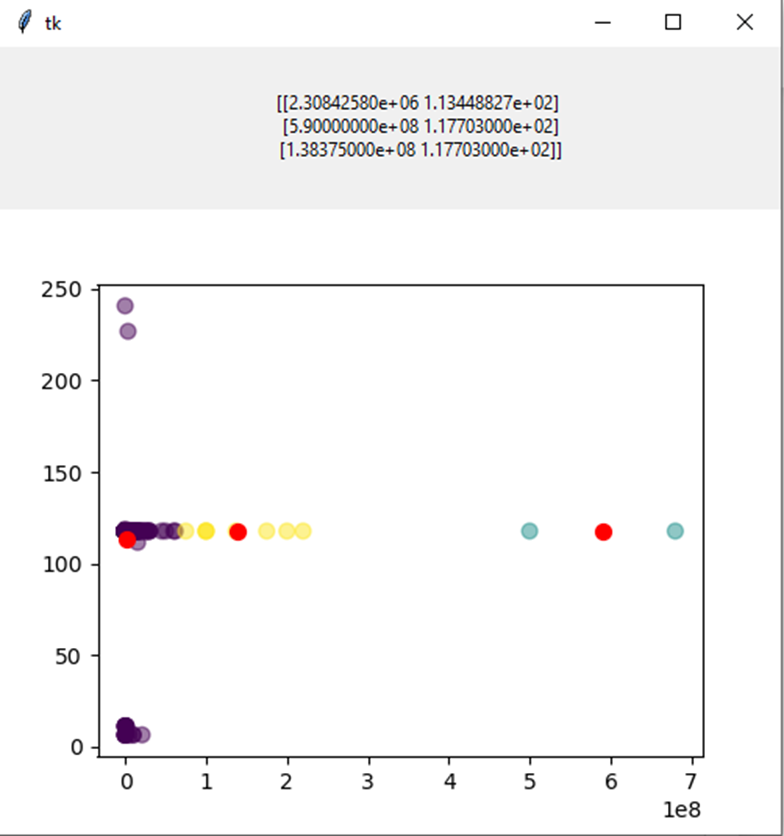

Loading back in the data that to save and contiune my work 

In [50]:
df=pd.read_excel(r'EDA_DATA.xlsx')

In [53]:
df['Amount (In USD)'].isnull().values.any()

True

In [54]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('', 0)

In [55]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('undisclosed', 0)

In [56]:
df.head(3)

,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,118
1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,118
2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,118


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             495 non-null    datetime64[ns]
 1   Startup Name     495 non-null    object        
 2   Industry         495 non-null    object        
 3   Sub-Vertical     495 non-null    object        
 4   State            495 non-null    object        
 5   Investors’ Name  491 non-null    object        
 6   Investment Type  495 non-null    object        
 7   Amount (In USD)  293 non-null    float64       
 8   Rank             495 non-null    int64         
 9   GDP              495 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 38.8+ KB


# Insights gathered

We can see that not necessarily the higher the GDP of the state, the more money. There are states with 200 -> 250 GDP compared to one state with just over 100 GDP. This means that funding must be based on population, amount of startups, or something else!
Delhi has a very large population, is the capital, and could have other factors that bring in start-ups. My hypothesis was correct that most money is going into Delhi.